# EDA
## Intro
In this section, we will perform initial analysis on the 2012 dataset that was provided. The purpose of this step is to better understand the structure and content of the data in hopes to notice patterns or trends that will assisnt in later analysis.

In [1]:
import uproot
import pandas as pd
import numpy as np
import scipy.stats
import math
from matplotlib import pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["c", "r"])
pd.set_option('display.width', 200)

C:\Users\brand\AppData\Roaming\.virtualenvs\phys_env\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


Analysis will be done with Python libraries. In order to do so, we will convert the ROOT data structure into a Pandas dataframe.

In [2]:
file = uproot.open("tree_TYPE_DATA_2012.root")
tree = file["tree_TYPE_DATA"]
df = tree.arrays(library='pd')
df.columns

Index(['RunNumber', 'EventNumber', 'invariant_mass', 'vtx_z', 'ph_pt_leading', 'ph_pt_subleading', 'ph_eta_corrected_leading', 'ph_eta_corrected_subleading', 'ph_etas1_leading',
       'ph_etas1_subleading', 'ph_etas2_leading', 'ph_etas2_subleading', 'ph_cl_eta_leading', 'ph_cl_eta_subleading', 'ph_eta_leading', 'ph_eta_subleading', 'ph_cl_phi_leading',
       'ph_cl_phi_subleading', 'ph_phi_leading', 'ph_phi_subleading', 'ph_OQ_leading', 'ph_OQ_subleading', 'ph_rawcl_E_leading', 'ph_rawcl_E_subleading', 'ph_isConv_leading', 'ph_isConv_subleading',
       'averageIntPerXing', 'PV_n', 'bcid', 'MET_RefFinal_et', 'categ_conv_eta', 'categ_conv_eta_ptt', 'categ_Model5Categories', 'categ_Model10Categories', 'categ_ModelHighPttEtaConvVBF',
       'categ_ModelHighPttGoodBadVBF', 'categ_conversion', 'categ_multiplicity_jets', 'categ_pTt'],
      dtype='object')

In [3]:
df.describe()

,RunNumber,EventNumber,invariant_mass,vtx_z,ph_pt_leading,ph_pt_subleading,ph_eta_corrected_leading,ph_eta_corrected_subleading,ph_etas1_leading,ph_etas1_subleading,...,MET_RefFinal_et,categ_conv_eta,categ_conv_eta_ptt,categ_Model5Categories,categ_Model10Categories,categ_ModelHighPttEtaConvVBF,categ_ModelHighPttGoodBadVBF,categ_conversion,categ_multiplicity_jets,categ_pTt
count,35251.000000,3.525100e+04,35251.000000,35251.000000,35251.000000,35251.000000,35251.000000,35251.000000,35251.000000,35251.000000,...,35251.000000,35251.000000,35251.000000,35251.000000,35251.000000,35251.000000,35251.000000,35251.000000,35251.000000,35251.000000
mean,203825.741823,6.033452e+07,123.069428,-5.058662,64442.843750,45645.222656,0.009402,0.005593,0.007152,0.003405,...,22562.433594,3.082835,5.217299,2.769226,5.236249,3.139883,1.874954,2.783779,0.011574,0.060367
std,1147.198241,4.979677e+07,16.468605,45.275646,19682.054688,10254.630859,1.226149,1.228077,1.226024,1.228322,...,13433.839844,1.279762,2.556080,0.764415,2.568862,1.334679,0.399886,1.742990,0.151707,0.238169
min,200842.000000,6.215800e+04,100.000195,-183.039230,36916.453125,27200.875000,-2.390311,-2.396316,-2.370833,-2.370645,...,145.953217,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,203353.000000,2.214227e+07,108.934336,-35.352140,51587.464844,37762.718750,-0.923128,-0.931366,-0.927777,-0.933281,...,12834.665527,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000
50%,204026.000000,4.758297e+07,120.066930,-5.208378,60313.660156,44315.777344,0.014567,0.004229,0.012698,-0.002328,...,20379.132812,3.000000,5.000000,3.000000,5.000000,3.000000,2.000000,3.000000,0.000000,0.000000
75%,204763.000000,8.516514e+07,135.206680,25.247466,72232.359375,51876.910156,0.935121,0.949715,0.931237,0.946808,...,29653.113281,4.000000,7.000000,3.000000,7.000000,4.000000,2.000000,4.000000,0.000000,0.000000
max,205113.000000,2.956147e+08,159.999422,213.882950,542560.000000,182216.203125,2.395933,2.393525,2.370928,2.373280,...,253838.578125,5.000000,9.000000,5.000000,10.000000,7.000000,4.000000,5.000000,2.000000,1.000000


## Columns
Here are the names of the columns in a more readable format. The descriptions of each column have been provided by Prof. Wang (with some additions of our own)

|Column Name|Description|
|-----------|-----------|
| `RunNumber` | Run number |
| `EventNumber` | Event number |
| `invariant_mass` | reconstructed diphoton mass [MeV] |
| `vtx_z` | `z`-position of vertex |
| `ph_pt_leading` | transverse momentum (pT) of the leading photon |
| `ph_pt_subleading` | pT of the subleading photon |
| `ph_eta_corrected_leading` | pseudo rapidity ($\eta$) of the leading photon |
| `ph_eta_corrected_subleading` | pseudo rapidity of the subleading photon |
| `ph_etas1_leading` | pseudo rapidity of the leading photon, as measured in the 1st layer of the calorimeter |
| `ph_etas1_subleading` | pseudo rapidity of the subleading photon, as measured in the 1st layer of the calorimeter |
| `ph_etas2_leading` | pseudo rapidity of the leading photon, as measured in the 2nd layer of the calorimeter |
| `ph_etas2_subleading` | pseudo rapidity of the subleading photon, as measured in the 2nd layer of the calorimeter |
| `ph_cl_eta_leading` | ? |
| `ph_cl_eta_subleading` | ? |
| `ph_eta_leading` | ? |
| `ph_eta_subleading` | ? |
| `ph_cl_phi_leading` | ? |
| `ph_cl_phi_subleading` | ? |
| `ph_phi_leading` | polar angle of in the transverse plane ($\phi$) of the leading photon |
| `ph_phi_subleading` |  polar angle of in the transverse plane ($\phi$) of the leading photon |
| `ph_OQ_leading` | ? |
| `ph_OQ_subleading` | ? |
| `ph_rawcl_E_leading` | ? |
| `ph_rawcl_E_subleading` | ? |
| `ph_isConv_leading` | bool type variable indicating whether or not the leading photon is converted |
| `ph_isConv_subleading` | bool type variable indicating whether or not the subleading photon is converted |
| `averageIntPerXing` | average number of interactions per bunch crossing in the lumi block |
| `PV_n` | number of reconstructed primary vertices |
| `bcid` | ? |
| `MET_RefFinal_et` | ? |

The following are flags used to define categories

|Column Name|Description|
|-----------|-----------|
| `categ_conv_eta` | ? |
| `categ_conv_eta_ptt` | ? |
| `categ_Model5Categories` | ? |
| `categ_Model10Categories` | ? |
| `categ_ModelHighPttEtaConvVBF` | ? |
| `categ_ModelHighPttGoodBadVBF` | ? |
| `categ_conversion` | ? |


Some columns are new (not present in 2011). We will explore these.

In [4]:
relevant = df[["vtx_z", "ph_OQ_leading", "bcid", "MET_RefFinal_et"]]
relevant.describe()

,vtx_z,ph_OQ_leading,bcid,MET_RefFinal_et
count,35251.000000,3.525100e+04,35251.000000,35251.000000
mean,-5.058662,2.331562e+07,1721.313098,22562.433594
std,45.275646,1.237995e+08,983.752746,13433.839844
min,-183.039230,0.000000e+00,1.000000,145.953217
25%,-35.352140,1.331280e+05,885.000000,12834.665527
50%,-5.208378,5.242960e+05,1737.000000,20379.132812
75%,25.247466,7.864320e+05,2595.000000,29653.113281
max,213.882950,8.228700e+08,3393.000000,253838.578125


## Reconstructing invariant mass
An example of this can be found in the 2011 EDA notebook.

## Categories
There are 7 given categories with which to categorize data. Here, we will explore these categories.

In [5]:
category_labels = ['categ_conv_eta', 'categ_conv_eta_ptt', 'categ_Model5Categories', 'categ_Model10Categories', 'categ_ModelHighPttEtaConvVBF', 'categ_ModelHighPttGoodBadVBF', 'categ_conversion']
cat_df = df[category_labels]
for category in category_labels:
    uniques = cat_df[category].value_counts().sort_index()
    print(f"{category}:\n{uniques.to_string()}\n"+'-'*40)

categ_conv_eta:
1     3133
2    12975
3     2135
4    11855
5     5153
----------------------------------------
categ_conv_eta_ptt:
1     2957
2      176
3    12168
4      807
5     2021
6      114
7    11132
8      723
9     5153
----------------------------------------
categ_Model5Categories:
1     4960
2      286
3    28073
4     1793
5      139
----------------------------------------
categ_Model10Categories:
1      2945
2       173
3     12136
4       785
5      2015
6       113
7     11099
8       706
9      5140
10      139
----------------------------------------
categ_ModelHighPttEtaConvVBF:
1     3069
2    12734
3     2090
4    11664
5     5082
6      473
7      139
----------------------------------------
categ_ModelHighPttGoodBadVBF:
1     5159
2    29480
3      473
4      139
----------------------------------------
categ_conversion:
1    16108
2     1240
3      685
4     8602
5     8616
----------------------------------------


#### `categ_Model10Categories`
From the ATLAS paper (Table 4), we can see that the number of events per label in `categ_Model10Categories` lines up with the number of events in the table. Therefore, we can interpret each number in `categ_Model10Categories` as follows:

| Label | Category |
|-------|----------|
| 1 | Unconv. central, low $p_{Tt}$ |
| 2 | Unconv. central, high $p_{Tt}$ |
| 3 | Unconv. rest, low $p_{Tt}$ |
| 4 | Unconv. rest, high $p_{Tt}$ |
| 5 | Conv. central, low $p_{Tt}$ |
| 6 | Conv. central, high $p_{Tt}$ |
| 7 | Conv. rest, low $p_{Tt}$ |
| 8 | Conv. central, high $p_{Tt}$ |
| 9 | Conv. transition |
| 10 | 2-jet |

We will use these categories to divide the dataset and perform separate analyses on each category, as was done in the paper.

#### Category-specific parameters
In Prof. Wang's CERN Thesis, we are given the Gaussian widths of the Crystal Ball functions for each category:

| Label | Category | $\sigma_{CB}$ (GeV) |
|-------|----------|---------------|
| 1 | Unconv. central, low $p_{Tt}$ | 1.46 |
| 2 | Unconv. central, high $p_{Tt}$ | 1.37 |
| 3 | Unconv. rest, low $p_{Tt}$ | 1.58 |
| 4 | Unconv. rest, high $p_{Tt}$ | 1.52 |
| 5 | Conv. central, low $p_{Tt}$ | 1.64 |
| 6 | Conv. central, high $p_{Tt}$ | 1.5 |
| 7 | Conv. rest, low $p_{Tt}$ | 1.89 |
| 8 | Conv. central, high $p_{Tt}$ | 1.65 |
| 9 | Conv. transition | 2.57 |
| 10 | 2-jet | 1.59 |

The categories are the same as the 2011 categories.

Below we have the bin widths and FWHM values (from Prof. Wang's CERN Thesis)

In [6]:
w_given = [2,4,1,2,2,4,1,2,1,4]
fwhm = [3.44,3.24,3.73,3.57,3.86,3.53,4.45,3.9,6.1,3.74]

For later reference, a table with all the relevant data for each category will be stored in `categ_mapping.csv`.

In [7]:
mapping = pd.DataFrame(
    {
        "label": [1,2,3,4,5,6,7,8,9,10],
        "categ_name": 
        ["Unconv. central, low p_{Tt}",
         "Unconv. central, high p_{Tt}",
         "Unconv. rest, low p_{Tt}",
         "Unconv. rest, high p_{Tt}",
         "Conv. central, low p_{Tt}",
         "Conv. central, high p_{Tt}",
         "Conv. rest, low p_{Tt}",
         "Conv. central, high p_{Tt}",
         "Conv. transition",
         "2-jet"],
        "sigma_cb": [1.46,1.37,1.58,1.52,1.64,1.5,1.89,1.65,2.57,1.59],
        "bin_width_given": w_given,
        "fwhm": fwhm
    })
mapping.to_csv("categ_mapping_2012.csv", index=False)

## Visualizations
The following are visualizations of the dataset.

#### E leading vs. E subleading

<ipython-input-8-e1a545e78a91>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


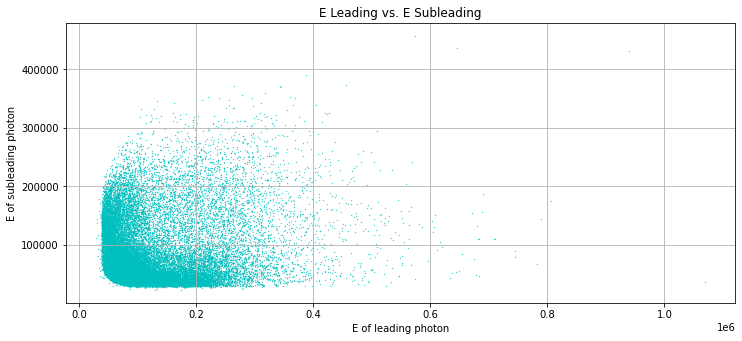

In [8]:
fig, ax = plt.subplots(figsize=(12,12))
ax.grid()
ax.scatter(df["ph_rawcl_E_leading"], df["ph_rawcl_E_subleading"], s=0.1)
ax.set_xlabel("E of leading photon")
ax.set_ylabel("E of subleading photon")
ax.set_aspect('equal')
ax.set_title('E Leading vs. E Subleading')
fig.show()

#### Parameter Histograms
Here, we plot histograms of $\eta$, $\phi$, $E$ and $p_T$ for the leading and subleading photons.

<ipython-input-9-7ec0aa5c0b37>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


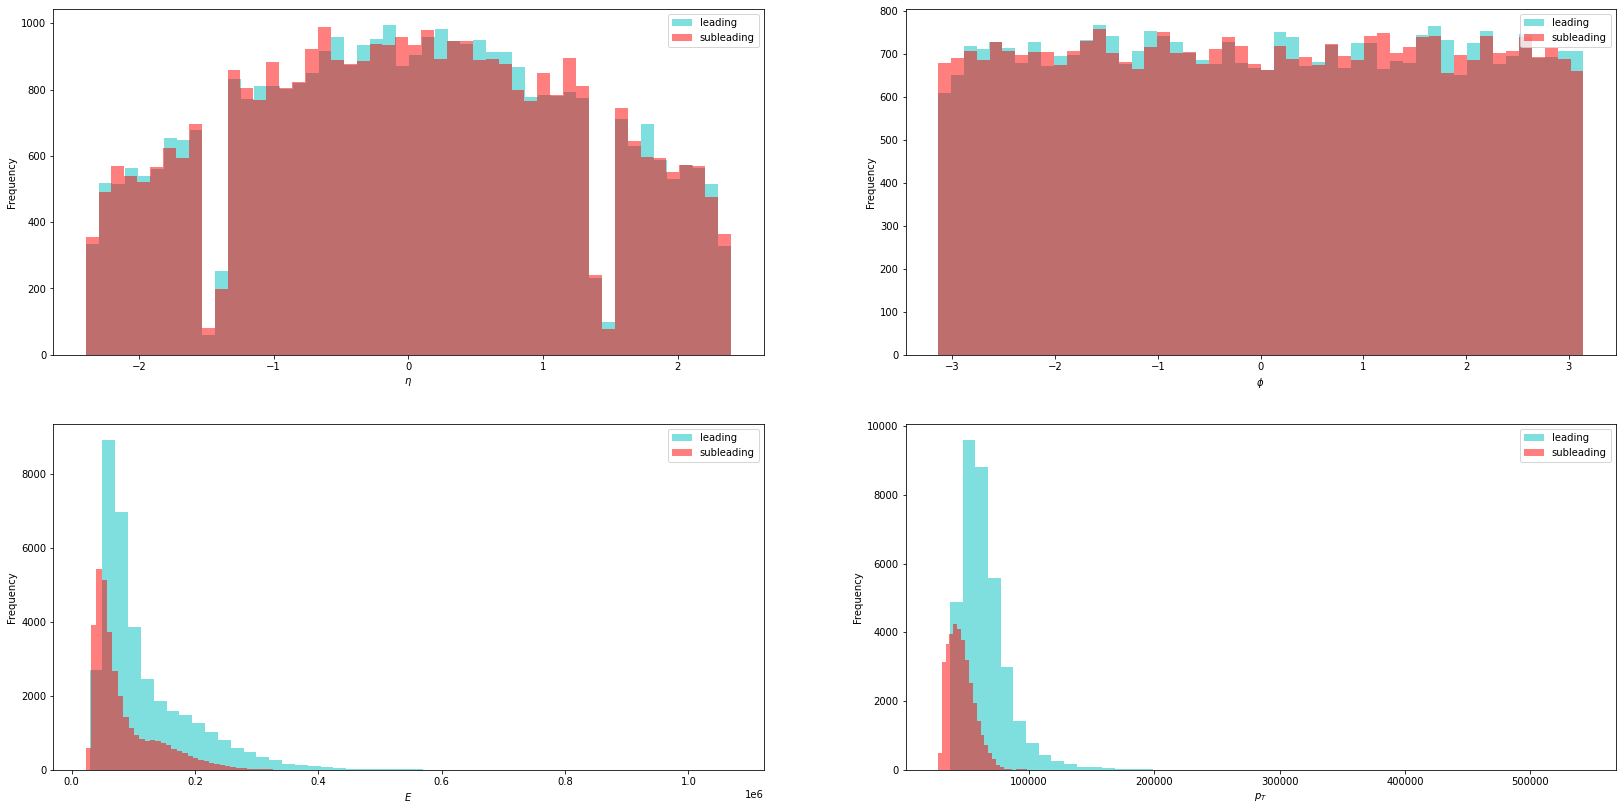

In [9]:
fig1, ax1 = plt.subplots(2, 2, figsize=(28,14))
n00_l, bins00_l, pat00_l = ax1[0,0].hist(df["ph_eta_corrected_leading"], 50, alpha=0.5, label="leading")
n00_s, bins00_s, pat00_s = ax1[0,0].hist(df["ph_eta_corrected_subleading"], 50, alpha=0.5, label="subleading")
ax1[0,0].set_ylabel("Frequency")
ax1[0,0].set_xlabel(r"$\eta$")
ax1[0,0].legend()

n01_l, bins01_l, pat01_l = ax1[0,1].hist(df["ph_phi_leading"], 50, alpha=0.5, label="leading")
n01_s, bins01_s, pat01_s_l = ax1[0,1].hist(df["ph_phi_subleading"], 50, alpha=0.5, label="subleading")
ax1[0,1].set_ylabel("Frequency")
ax1[0,1].set_xlabel(r"$\phi$")
ax1[0,1].legend()

n10_l, bins10_l, pat10_l = ax1[1,0].hist(df["ph_rawcl_E_leading"], 50, alpha=0.5, label="leading")
n10_s, bins10_s, pat10_s = ax1[1,0].hist(df["ph_rawcl_E_subleading"], 50, alpha=0.5, label="subleading")
ax1[1,0].set_ylabel("Frequency")
ax1[1,0].set_xlabel(r"$E$")
ax1[1,0].legend()

n11_l, bins11_l, pat11_l = ax1[1,1].hist(df["ph_pt_leading"], 50, alpha=0.5, label="leading")
n11_s, bins11_s, pat11_s = ax1[1,1].hist(df["ph_pt_subleading"], 50, alpha=0.5, label="subleading")
ax1[1,1].set_ylabel("Frequency")
ax1[1,1].set_xlabel(r"$p_T$")
ax1[1,1].legend()

fig1.show()

We can see here that $\eta$ is distributed uniquely: there is a lack of photons with $|\eta|\approx1.5$<br>
$\phi$ seems to be evenly distributed.<br>
The energy and transverse momentum distributions look to be almost poisson?

#### `z` Position Visualization
Here, we will plot the distribution of vertices along the z position as a histogram.

<ipython-input-10-50800fd15fed>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


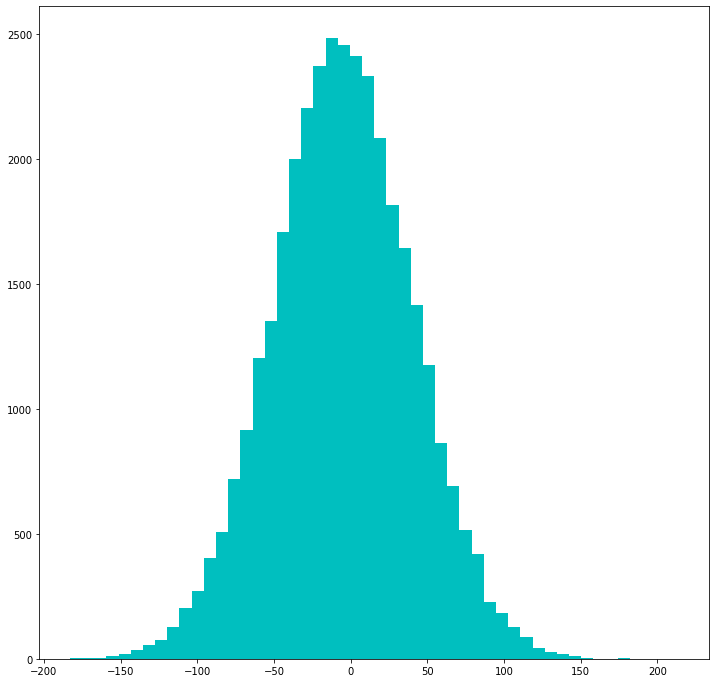

In [10]:
fig2, ax2 = plt.subplots(figsize=(12, 12))
nz, binz, patz = ax2.hist(df["vtx_z"], 50)

fig2.show()